## Project Foundation for AIML - MovieLens Data Exploration



##### 1: Data import (10 marks)

In [4]:
import pandas as pd

import matplotlib.pyplot as plt   
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [5]:
#import data

df_ratings = pd.read_csv('ml-100k/u.data', sep = '\t',names= ['user id', 'item id', 'rating', 'timestamp' ])


In [6]:
df_ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
item id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


Import u.genre and generate a list of genres. This will be used to add the genre names to the item dataframe

In [8]:
df_genre = pd.read_csv('ml-100k/u.genre', sep = "|",names= ['genre', 'genre id' ])

In [9]:
df_genre.head(5)

,genre,genre id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [10]:
genre_list = list(df_genre['genre'])
print(genre_list)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [11]:
column_names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL'] + genre_list
print(column_names)

['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [12]:
df_items = pd.read_csv('ml-100k/u.item', sep = "|",names= column_names, encoding = "ISO-8859-1")

In [13]:
df_items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [15]:
#  drop single item that has no release date

df_items.dropna(subset=['release date'], inplace=True)

In [16]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1681 non-null int64
movie title           1681 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1681 non-null int64
Action                1681 non-null int64
Adventure             1681 non-null int64
Animation             1681 non-null int64
Children's            1681 non-null int64
Comedy                1681 non-null int64
Crime                 1681 non-null int64
Documentary           1681 non-null int64
Drama                 1681 non-null int64
Fantasy               1681 non-null int64
Film-Noir             1681 non-null int64
Horror                1681 non-null int64
Musical               1681 non-null int64
Mystery               1681 non-null int64
Romance               1681 non-null int64
Sci-Fi                1681 non-null int64
Thriller 

In [17]:
# convert release date to datetime

df_items['release date'] = pd.to_datetime(df_items['release date'], format="%d-%b-%Y")

In [18]:
df_users = pd.read_csv('ml-100k/u.user', sep = "|",names= ['user id', 'age', 'gender', 'occupation', 'zip code'])
df_users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


##### 2: Univariate plots (10 marks)

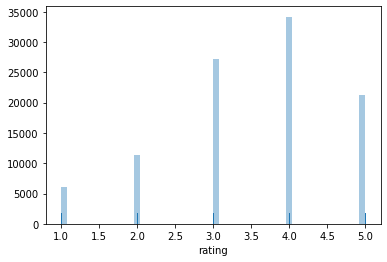

In [23]:
sns.distplot(df_ratings['rating'], kde=False, rug=True)

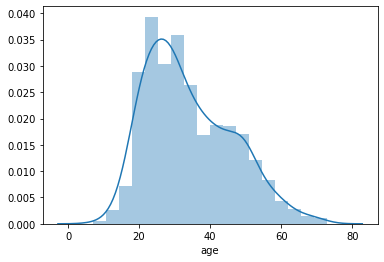

In [18]:
sns.distplot(df_users['age'])

In [19]:
df_items['release date'].describe()

count                    1681
unique                    240
top       1995-01-01 00:00:00
freq                      215
first     1922-01-01 00:00:00
last      1998-10-23 00:00:00
Name: release date, dtype: object

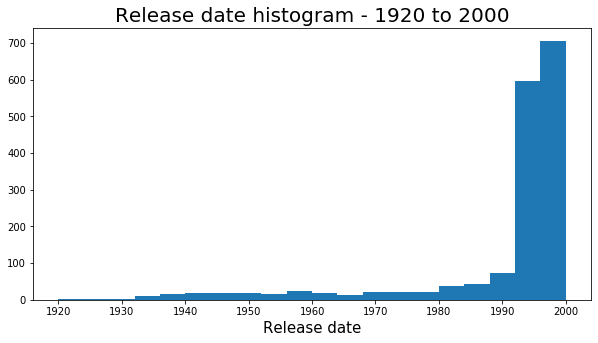

In [74]:
figure, ax = plt.subplots(figsize=(10,5))

plt.title('Release date histogram - 1920 to 2000', fontsize=20)
ax.set_xlabel('Release date', fontsize=15) 
ax.hist(df_items['release date'], bins=20, range=['01-Jan-1920', '01-Jan-2000'])

plt.show()

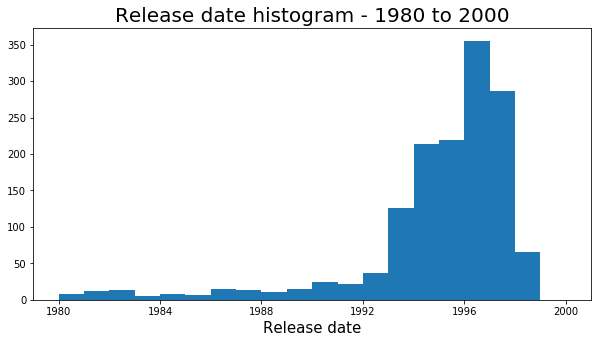

In [21]:
figure, ax = plt.subplots(figsize=(10,5))
plt.title('Release date histogram - 1980 to 2000', fontsize=20)
ax.set_xlabel('Release date', fontsize=15) 
ax.hist(df_items['release date'], bins=20, range=['01-Jan-1980', '01-Jan-2000'])

plt.show()

Note: the data was collected up until 22 April 1998. The number of releases in 1998 is not for a full year, therefor the vaule is low and this year should possibly be omitted if release date is used in an ML model.

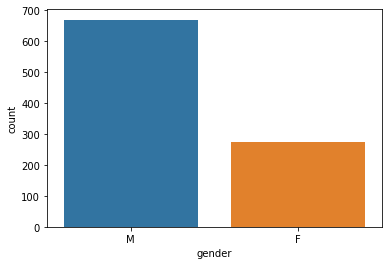

In [22]:
sns.countplot(df_users['gender'])

[Text(0, 0, 'technician'),
 Text(0, 0, 'other'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'executive'),
 Text(0, 0, 'administrator'),
 Text(0, 0, 'student'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'educator'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'programmer'),
 Text(0, 0, 'librarian'),
 Text(0, 0, 'homemaker'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'none'),
 Text(0, 0, 'healthcare'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'salesman'),
 Text(0, 0, 'doctor')]

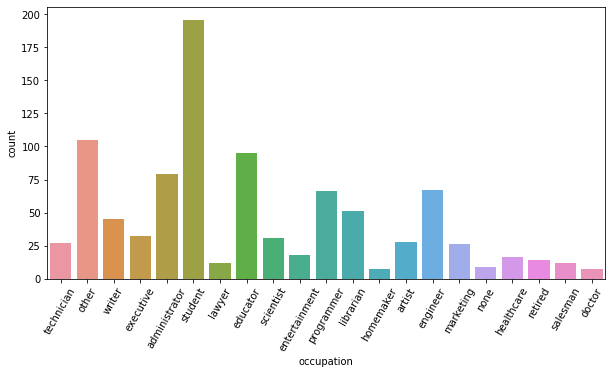

In [23]:
plt.figure(figsize=(10, 5))
chart = sns.countplot(df_users['occupation'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

##### 3: Change in genre popularity (15 marks)

Because the number of movies released each year seems to be increasing, the best way to illustrate the way the populatiry is changing would be to make use of relative popularity (i.e. percentage of films in a year from a specific genre), rather than absolute popularity.

In [24]:
# add column for release year

df_items['release year'] = pd.DatetimeIndex(df_items['release date']).year

In [25]:
# create dataframe of genres by year

df_genres_by_year = df_items.groupby(['release year'])[genre_list].apply(lambda x: (x == 1).sum())
df_genres_by_year.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1922 to 1998
Data columns (total 19 columns):
unknown        71 non-null int64
Action         71 non-null int64
Adventure      71 non-null int64
Animation      71 non-null int64
Children's     71 non-null int64
Comedy         71 non-null int64
Crime          71 non-null int64
Documentary    71 non-null int64
Drama          71 non-null int64
Fantasy        71 non-null int64
Film-Noir      71 non-null int64
Horror         71 non-null int64
Musical        71 non-null int64
Mystery        71 non-null int64
Romance        71 non-null int64
Sci-Fi         71 non-null int64
Thriller       71 non-null int64
War            71 non-null int64
Western        71 non-null int64
dtypes: int64(19)
memory usage: 11.1 KB


In [26]:
df_genres_by_year.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [27]:
# add column for total movies for a year. This is needed to calculate the percentage movies released for each genre

df_genres_by_year['total movies'] = df_genres_by_year[genre_list].sum(axis=1)

In [28]:
df_genres_by_year[genre_list] = df_genres_by_year[genre_list].div(df_genres_by_year['total movies'], axis=0)

In [29]:
print(df_genres_by_year)

              unknown    Action  Adventure  Animation  Children's    Comedy  \
release year                                                                  
1922              0.0  0.000000   0.000000   0.000000    0.000000  0.000000   
1926              0.0  0.000000   0.000000   0.000000    0.000000  0.000000   
1930              0.0  0.000000   0.000000   0.000000    0.000000  0.000000   
1931              0.0  0.000000   0.000000   0.000000    0.000000  0.000000   
1932              0.0  0.000000   0.000000   0.000000    0.000000  0.000000   
...               ...       ...        ...        ...         ...       ...   
1994              0.0  0.084986   0.036827   0.011331    0.042493  0.232295   
1995              0.0  0.104987   0.057743   0.015748    0.055118  0.165354   
1996              0.0  0.078712   0.042934   0.016100    0.037567  0.193202   
1997              0.0  0.092742   0.040323   0.006048    0.044355  0.175403   
1998              0.0  0.102564   0.025641   0.00000

In [30]:
# drop 'total movies' so heatmap can be plotted

df_genres_by_year.drop('total movies', axis=1, inplace=True)

Text(0.5, 159.0, 'Genre')

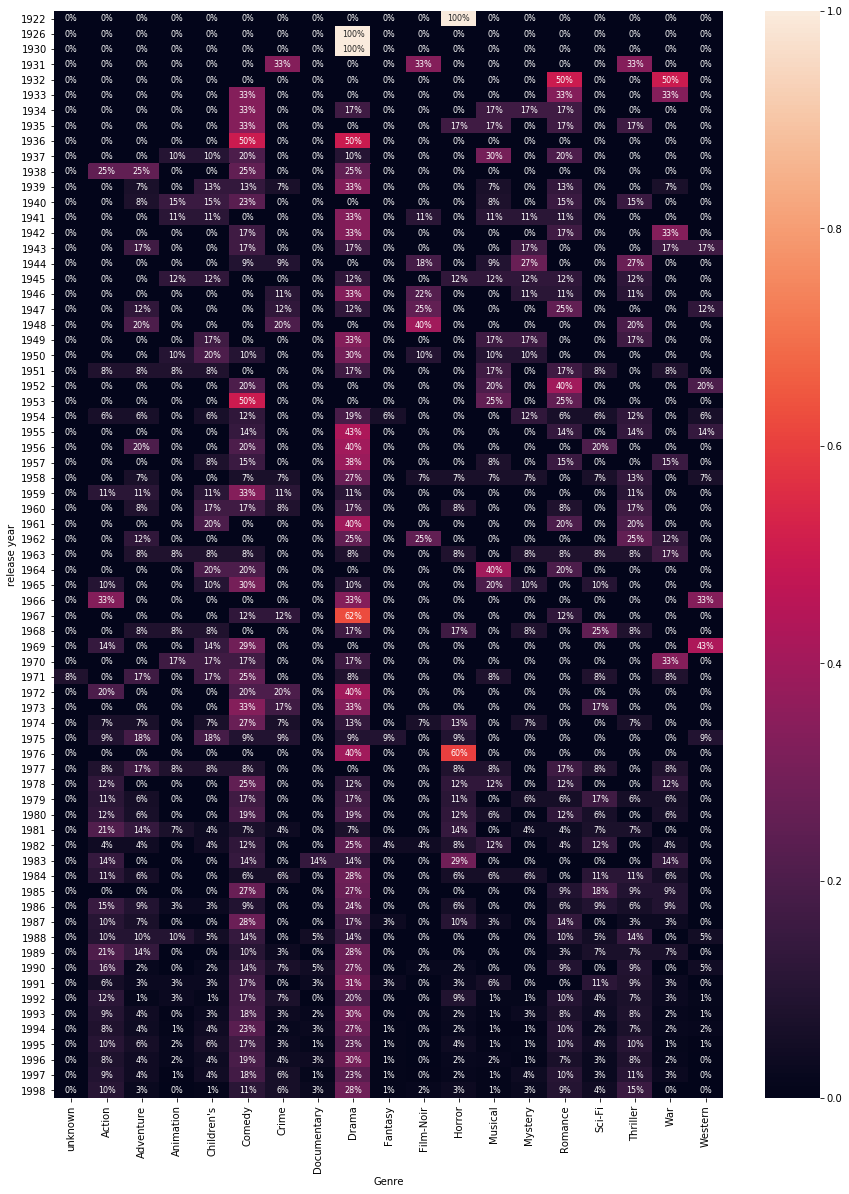

In [31]:
plt.figure(figsize=(15, 20))

ax = sns.heatmap(df_genres_by_year, annot=True, fmt=".0%", annot_kws={"fontsize":8})
bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Genre', fontsize=10)

##### 4: Top 25 movies by average rating (10 marks)

In [32]:
# calculate the total rating for each movie (sum of ratings)

lst_total_rating = df_ratings.groupby(['item id'])['rating'].sum()

In [33]:
df_rating_per_movie = pd.DataFrame(lst_total_rating)
df_rating_per_movie.head()

,rating
item id,
1,1753
2,420
3,273
4,742
5,284


In [34]:
# calculate the total number of ratings for each movie

lst_no_ratings = df_ratings.groupby(['item id'])['rating'].count()

lst_no_ratings.head()


item id
1    452
2    131
3     90
4    209
5     86
Name: rating, dtype: int64

In [35]:
df_rating_per_movie['number of ratings'] = lst_no_ratings

In [36]:
# calculate the average rating of each movie

df_rating_per_movie['average rating'] = df_rating_per_movie['rating'].div(df_rating_per_movie['number of ratings'], axis=0)

In [37]:
df_rating_per_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 3 columns):
rating               1682 non-null int64
number of ratings    1682 non-null int64
average rating       1682 non-null float64
dtypes: float64(1), int64(2)
memory usage: 52.6 KB


In [38]:
# drop movies that have fewer than 100 ratings

df_top_movies = df_rating_per_movie.drop(df_rating_per_movie[df_rating_per_movie['number of ratings'] < 100].index)

In [39]:
df_top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1 to 1047
Data columns (total 3 columns):
rating               338 non-null int64
number of ratings    338 non-null int64
average rating       338 non-null float64
dtypes: float64(1), int64(2)
memory usage: 10.6 KB


In [40]:
df_top_movies_sorted = df_top_movies.sort_values(by='average rating',ascending=False)

In [41]:
df_top_movies_sorted.reset_index(level=0, inplace=True)

In [42]:
df_top_movies_sorted.head()

,item id,rating,number of ratings,average rating
0,408,503,112,4.491071
1,318,1331,298,4.466443
2,169,527,118,4.466102
3,483,1083,243,4.456790
4,64,1258,283,4.445230


In [43]:
# merge dataframes to get the movie names. 
# Create new dataframe for the movies that only contains what we need ('movie id' and 'movie title'),
# and rename 'movie id' to 'item id'

df_items_red = df_items[['movie id','movie title']]

df_items_red = df_items_red.rename({'movie id': 'item id'}, axis=1) 



In [44]:
df_top_movies_sorted_names = df_top_movies_sorted.merge(df_items_red, on='item id', how='left')

In [45]:
df_top_movies_sorted_names.head()

,item id,rating,number of ratings,average rating,movie title
0,408,503,112,4.491071,"Close Shave, A (1995)"
1,318,1331,298,4.466443,Schindler's List (1993)
2,169,527,118,4.466102,"Wrong Trousers, The (1993)"
3,483,1083,243,4.456790,Casablanca (1942)
4,64,1258,283,4.445230,"Shawshank Redemption, The (1994)"


In [46]:
df_top25_movies = df_top_movies_sorted_names.iloc[:25,:]


In [47]:
df_top25_movies.head(25)

,item id,rating,number of ratings,average rating,movie title
0,408,503,112,4.491071,"Close Shave, A (1995)"
1,318,1331,298,4.466443,Schindler's List (1993)
2,169,527,118,4.466102,"Wrong Trousers, The (1993)"
3,483,1083,243,4.456790,Casablanca (1942)
4,64,1258,283,4.445230,"Shawshank Redemption, The (1994)"
5,603,917,209,4.387560,Rear Window (1954)
6,12,1171,267,4.385768,"Usual Suspects, The (1995)"
7,50,2541,583,4.358491,Star Wars (1977)
8,178,543,125,4.344000,12 Angry Men (1957)
9,134,850,198,4.292929,Citizen Kane (1941)


In [48]:
# drop columns that are not needed for final list

df_top25_movies_red = df_top25_movies.copy()
df_top25_movies_red.drop(['item id','rating','number of ratings'],axis=1,inplace=True)

In [49]:
df_top25_movies_red.head(25)

,average rating,movie title
0,4.491071,"Close Shave, A (1995)"
1,4.466443,Schindler's List (1993)
2,4.466102,"Wrong Trousers, The (1993)"
3,4.456790,Casablanca (1942)
4,4.445230,"Shawshank Redemption, The (1994)"
5,4.387560,Rear Window (1954)
6,4.385768,"Usual Suspects, The (1995)"
7,4.358491,Star Wars (1977)
8,4.344000,12 Angry Men (1957)
9,4.292929,Citizen Kane (1941)


##### 5: Statement validity (15 marks)

Due to the fact that there are in general more men rating movies than women (could be seen in univariate plots, and total number of male and female ratings will be checked), the number of ratings for men and women can be normalised with the total ratings by men and women respectivly (i.e. percentage of total). This will give a more realistic answer to the question of relative preference for different genres.

Note: in this section, the assumption is made that in the dataset we are using, there are no occurance of raters having watched a movie but not rated it. If this were the case we could not state that men or women watch more movies of a particular genre based on number of ratings.

In [26]:
# merge ratings and user to include gender in ratings

df_ratings_gen = df_ratings.merge(df_users, on='user id', how='left')

In [27]:
df_ratings_gen.info


<bound method DataFrame.info of        user id  item id  rating  timestamp  age gender     occupation zip code
0          196      242       3  881250949   49      M         writer    55105
1          186      302       3  891717742   39      F      executive    00000
2           22      377       1  878887116   25      M         writer    40206
3          244       51       2  880606923   28      M     technician    80525
4          166      346       1  886397596   47      M       educator    55113
...        ...      ...     ...        ...  ...    ...            ...      ...
99995      880      476       3  880175444   13      M        student    83702
99996      716      204       5  879795543   36      F  administrator    44265
99997      276     1090       1  874795795   21      M        student    95064
99998       13      225       2  882399156   47      M       educator    29206
99999       12      203       3  879959583   28      F          other    06405

[100000 rows x 8 co

In [52]:
# check if there are any items that have no gender listed (test passed if only two)

df_ratings_gen['gender'].nunique()

2

In [28]:
lst_no_male_ratings = df_ratings_gen.groupby(['item id'])['gender'].apply(lambda x: (x == 'M').sum())
lst_no_female_ratings = df_ratings_gen.groupby(['item id'])['gender'].apply(lambda x: (x == 'F').sum())


In [29]:
print(lst_no_male_ratings)

item id
1       333
2       112
3        74
4       164
5        64
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: gender, Length: 1682, dtype: int64


In [55]:
df_rating_per_movie = pd.DataFrame()

In [56]:
df_rating_per_movie['male ratings'] = lst_no_male_ratings
df_rating_per_movie['female ratings'] = lst_no_female_ratings

In [57]:
df_rating_per_movie.reset_index(level=0, inplace=True)

In [58]:
df_rating_per_movie = df_rating_per_movie.rename({'item id': 'movie id'}, axis=1) 

In [59]:
df_rating_per_movie.head()

,movie id,male ratings,female ratings
0,1,333,119
1,2,112,19
2,3,74,16
3,4,164,45
4,5,64,22


In [60]:
# calculate the total number of male and female ratings for use in normalisation, 
# and verify if there are more men than women rating movies

total_male_ratings = df_rating_per_movie['male ratings'].sum()
total_female_ratings = df_rating_per_movie['female ratings'].sum()

In [61]:
print(total_male_ratings)

74260


In [62]:
print(total_female_ratings)

25740


In [63]:
df_items_gen = df_items.merge(df_rating_per_movie, on='movie id', how='left')

In [64]:
df_items_gen.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,male ratings,female ratings
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,1995,333,119
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,1,0,0,1995,112,19
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,74,16
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,164,45
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,1995,64,22


In [65]:
df_items_gen['male ratings normalised'] = df_items_gen['male ratings']/total_male_ratings

In [66]:
df_items_gen['female ratings normalised'] = df_items_gen['female ratings']/total_female_ratings

In [67]:
df_items_gen.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Romance,Sci-Fi,Thriller,War,Western,release year,male ratings,female ratings,male ratings normalised,female ratings normalised
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,1995,333,119,0.004484,0.004623
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,1,0,0,1995,112,19,0.001508,0.000738
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,1,0,0,1995,74,16,0.000996,0.000622
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,1995,164,45,0.002208,0.001748
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,1,0,0,1995,64,22,0.000862,0.000855


5.1: Men watch more drama than women

In [68]:
drama_male_ratings = df_items_gen.groupby(['Drama'])['male ratings normalised'].sum()[1]
print(drama_male_ratings)

0.3889981147320213


In [69]:
drama_female_ratings = df_items_gen.groupby(['Drama'])['female ratings normalised'].sum()[1]
print(drama_female_ratings)

0.4276612276612252


Men watch more drama than women - answer: false

5.2: Men watch more romance than women

In [70]:
romance_male_ratings = df_items_gen.groupby(['Romance'])['male ratings normalised'].sum()[1]
print(romance_male_ratings)

0.18318071640183142


In [71]:
romance_female_ratings = df_items_gen.groupby(['Romance'])['female ratings normalised'].sum()[1]
print(romance_female_ratings)

0.22758352758352765


Men watch more romance than women - answer: false

5.3: Women watch more sci-fi than men

In [72]:
scifi_male_ratings = df_items_gen.groupby(['Sci-Fi'])['male ratings normalised'].sum()[1]
print(scifi_male_ratings)

0.136022084567735


In [73]:
scifi_female_ratings = df_items_gen.groupby(['Sci-Fi'])['female ratings normalised'].sum()[1]
print(scifi_female_ratings)

0.10213675213675205


Women watch more sci-fi than men - answer: false

In [ ]:
Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western'] 
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100 
